# Core: Resampling Datetime Data

For this assignment, you will be working with a modified version of weather data from London from Kaggle.

The assignment is split into 2 parts:

Part 1: Load the data and create a datetime index

Part 2: Answer 2 Questions using visualizations and the correct frequency data

# Part 1) 
Load the data and make a datetime index.

Use the modified version of the data provided here:

Share URL: 
https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing

Raw URL:
https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv

You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4. Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(file)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Data Cleaning

In [3]:
# convert data column type
df['datetime'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df.info()
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
11819,20110512,4.0,7.8,232.0,18.6,13.4,7.4,0.0,102050.0,NaN,2011-05-12
10815,20080811,7.0,1.8,123.0,19.9,17.2,14.6,7.6,100220.0,NaN,2008-08-11
15290,20201111,8.0,2.5,55.0,14.0,10.0,6.1,6.2,101920.0,NaN,2020-11-11


In [4]:
df['datetime'].head()

0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: datetime, dtype: datetime64[ns]

In [5]:
# set the datetime column as the index
df = df.set_index('datetime')
df.sample(3)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1981-07-02,19810702,6.0,4.8,200.0,18.0,13.6,9.1,0.0,100780.0,0.0
1996-08-25,19960825,7.0,6.8,188.0,21.1,17.2,13.6,0.4,100800.0,0.0
1997-05-10,19970510,5.0,6.4,210.0,16.2,11.6,7.9,0.2,100200.0,0.0


In [6]:
# keep only year > 2000
df2000 = df.loc[df.index.year >= 2000]
df2000

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2000-01-01,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [7]:
# keep only the columns needed 
cols_to_keep = ['precipitation', 'mean_temp', 'min_temp', 
                'max_temp', 'snow_depth']
df2000 = df2000[cols_to_keep]
df2000

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


<AxesSubplot: >

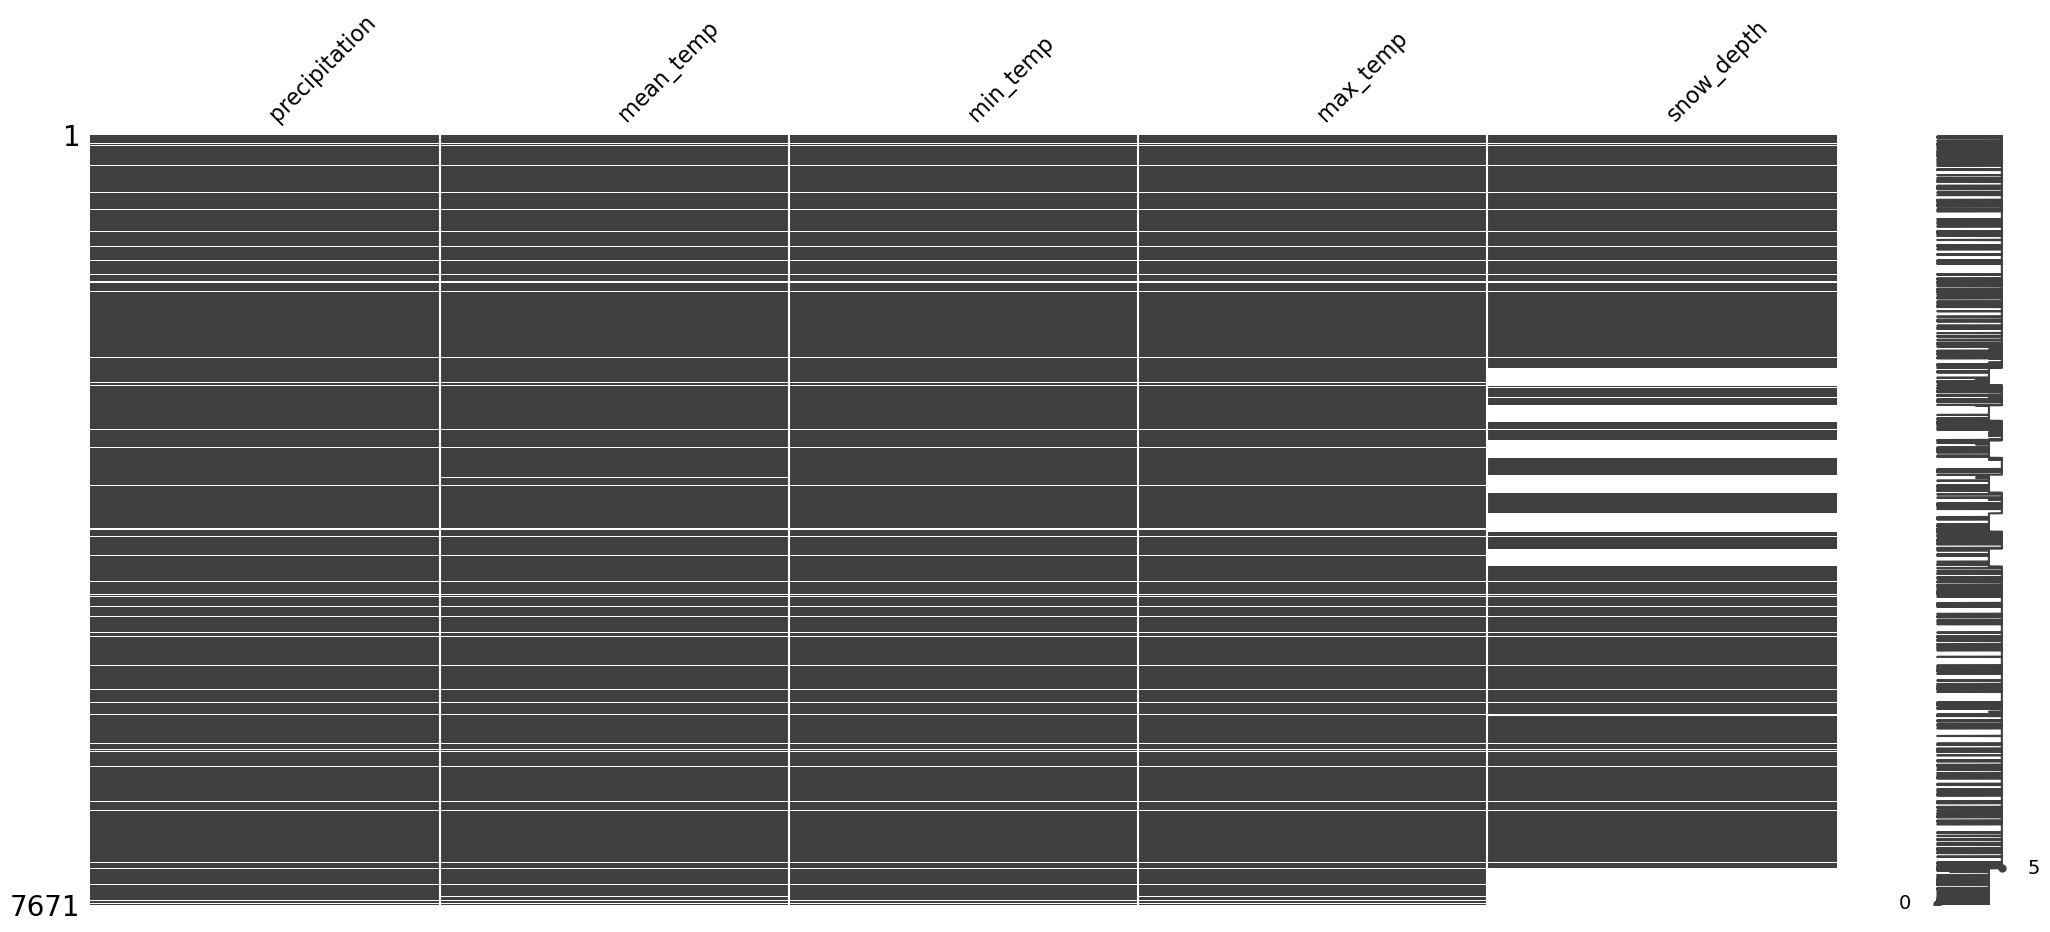

In [8]:
# missing values
df2000.isna().sum()
msno.matrix(df2000)

In [9]:
# checking values
df2000.describe()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
count,7281.000000,7252.000000,7285.000000,7281.000000,5919.000000
mean,1.723376,11.907308,8.000480,15.810850,0.023146
std,3.675610,5.669191,5.242933,6.526161,0.306467
min,0.000000,-4.100000,-9.400000,-1.200000,0.000000
25%,0.000000,7.600000,4.100000,10.800000,0.000000
50%,0.000000,11.800000,8.200000,15.600000,0.000000
75%,1.800000,16.400000,12.100000,20.700000,0.000000
max,51.600000,29.000000,22.300000,37.900000,12.000000


In [10]:
for col in df2000:
    df2000[col] = df2000[col].interpolate()

In [11]:
df2000.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2
Answer the Questions with Visualizations (Using the Correct Frequency)

- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.
    
Note: you may want to make a temporary DataFrame that you will use to answer this question only.

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.
    
<b> Visualization Issue Workaround
    
NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled:
    
To get around this issue, first, create your fig and ax using plt.subplots()
    
Now you may use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().
    
<b> Visualization Requirements
    
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks.    


In [12]:
precipitation = df2000['precipitation'].loc['2000' : '2010']
precipitation

datetime
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [13]:
# resample
precipitation = precipitation.resample('MS').mean()
precipitation.head()

datetime
2000-01-01    0.467742
2000-02-01    2.234483
2000-03-01    0.448387
2000-04-01    2.750000
2000-05-01    2.516129
Freq: MS, Name: precipitation, dtype: float64

In [14]:
# max precipitation
max_precipitation = precipitation.idxmax()
print(max_precipitation)
print(precipitation.loc[max_precipitation])

2000-10-01 00:00:00
4.925806451612903


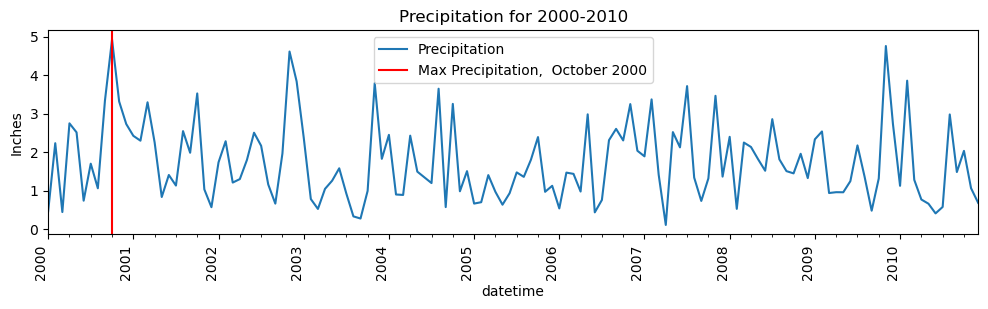

In [15]:
fig, ax = plt.subplots(figsize = (12, 3))

precipitation.plot()

fig.autofmt_xdate(which = 'major', rotation = 90)

ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')

ax.axvline(x = max_precipitation, color = 'r', linestyle = '-',
           label = f'Max Precipitation, {max_precipitation : %B %Y}')

handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]

ax.legend(handles, labels);

## Q2: Which year between 2000-2020 had the coolest average temperature?

- Resample the data as Yearly frequency.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") - and the lowest mean temperature value.

In [16]:
coolest = df2000['mean_temp'].loc['2000' : '2020']
coolest

datetime
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [17]:
coolest = coolest.resample('AS').mean()
coolest.head()              

datetime
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [18]:
# max precipitation
min_coolest = coolest.idxmin()
print(min_coolest)
print(coolest.loc[min_coolest])

2010-01-01 00:00:00
10.657397260273973


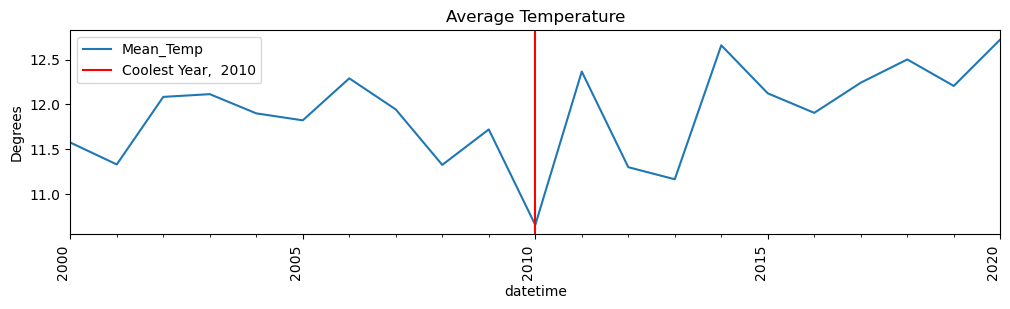

In [19]:
fig, ax = plt.subplots(figsize = (12, 3))

coolest.plot(ax = ax)

fig.autofmt_xdate(which = 'major', rotation = 90)

ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')

ax.axvline(x = min_coolest, color = 'r', linestyle = '-',
           label = f'Coolest Year, {min_coolest : %Y}')

handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]

ax.legend(handles, labels);